# Part I : Supervised Learning

## Portugal Bank Marketing

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from warnings import filterwarnings
filterwarnings('ignore')

### Creating a dataframe and a copy to work on

In [2]:
df=pd.read_csv('bank.csv',delimiter=';')# load the data

In [3]:
df=df.copy()# copy the data

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


## checking shape

In [6]:
df.shape # shape of the data

(41188, 21)

## checking data type


In [7]:
df.dtypes # shows the data types

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Missing Value 

In [8]:
df.isnull().sum() # checking the missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

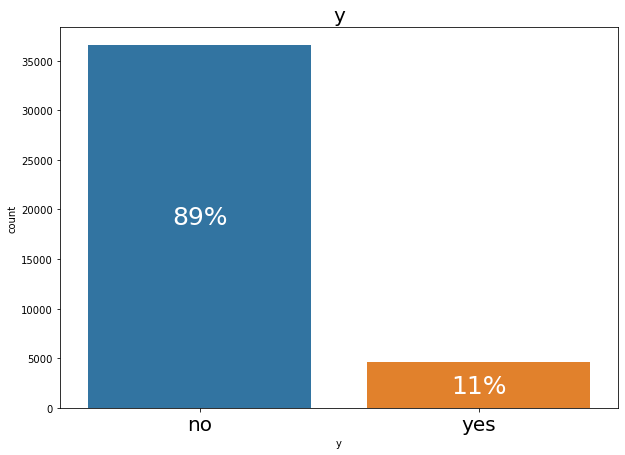

In [9]:
plt.figure(figsize=(10,7)) #count plot
sns.countplot(x="y", data=df)
percentage_y = df['y'].agg('value_counts', normalize=True) * 100
plt.title("y",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.text(0, 18000, "{:.2g}%".format(percentage_y[0]),  ha='center', va='bottom', size=25, color='w')
plt.text(1, 1000, "{:.2g}%".format(percentage_y[1]),  ha='center', va='bottom', size=25, color='w')
plt.show()

<AxesSubplot:>

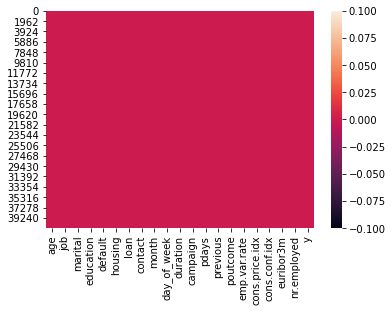

In [10]:
sns.heatmap(df.isnull()) # heat map

### Seperating into Numerical and Categorical Datasets

In [11]:
df_categorical=df.select_dtypes(include='object')
df_categorical_cols=list(df_categorical.columns)
df_numerical=df.select_dtypes(exclude='object')
df_numerical_cols=list(df_numerical.columns)

### Standardization

In [12]:
ss=StandardScaler()

In [13]:
df_numerical=ss.fit_transform(df_numerical)
df_numerical=pd.DataFrame(df_numerical,columns=df_numerical_cols)

###  Label Encoding

In [14]:
le = LabelEncoder()

In [15]:
for i in df_categorical_cols:
#     if i=='y':
#         continue
    df_categorical[i]=le.fit_transform(df_categorical[i])

### Combining the numerical and categorical 

In [16]:
df_final=pd.concat([df_categorical,df_numerical],axis=1)

In [17]:
df_final.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

### Train Test Split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(df_final.drop('y',axis=1),df_final['y'],test_size=0.3)

### Selecting Features using Random Forests

In [19]:
sel = SelectFromModel(RandomForestClassifier())
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['age', 'duration', 'euribor3m', 'nr.employed'], dtype='object')


We can see that the important features are printed above using RandomForest Selection

### Models

### KNN

In [25]:
x=df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'y'],axis=1)
y=df['y']

In [26]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
NNHH = KNeighborsClassifier(n_neighbors= 49 ,metric='euclidean' )

In [29]:
scaler=StandardScaler()

In [30]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [31]:
NNHH.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=49)

In [32]:
y_predi = NNHH.predict(x_test)


In [33]:
NNHH.score(x_train, y_train)

0.9103742499393015

In [34]:
NNHH.score(x_test, y_test)


0.909686817188638

### SVM

In [41]:
from sklearn import svm
svm = svm.SVC(kernel='linear',gamma=0.025, C=3) 
svm.fit(x_train, y_train)
y_preds = svm.predict(x_test)

In [42]:
svm.score(x_train, y_train)

0.8940376677881448

In [43]:
svm.score(x_test, y_test)

0.8949583232176095

### Logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [49]:
predictions=model.predict(x_test)
model.score(x_train,y_train)


0.9020845617564427

In [48]:
model.score(x_test,y_test)

0.9066116371287529

### AdaBoost

In [50]:
from sklearn.ensemble import AdaBoostClassifier

In [51]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [52]:
model.score(x_train, y_train)

0.9030210537268912

In [53]:
model.score(x_test, y_test)

0.9072590434571498

### Naïve Bayes

In [54]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_predict = gnb.predict(x_test)

In [55]:
gnb.score(x_train, y_train)

0.8869966355658839

In [56]:
gnb.score(x_test, y_test)

0.893825362142915

We can see that except Naive Bayes the other methods are perform well. Logistic Regression is doing better since it has little difference between Train and Test Scores and the highest Test Score.

# Part II : Time Series

## Indian Onion Market

In [58]:
data=pd.read_csv('MonthWiseMarketArrivals_Clean.csv')
data=data.copy()

In [59]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [60]:
data.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014
10226,YEOLA(MS),December,2015,223315,609,1446,1126,MS,YEOLA,December-2015


### checking shape

In [36]:
data.shape

(10227, 10)

### checking data type

In [37]:
data.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

### Missing Values 

In [38]:
data.isnull().sum() #Missing values

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

### Modal price of onion for each month for the Mumbai

In [61]:
data.date = pd.DatetimeIndex(data.date)

In [62]:
data.index = pd.PeriodIndex(data.date, freq="M")
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [63]:
df_Mumbai = data.loc[data.city == "MUMBAI"].copy()
df_Mumbai.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
2005-01,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,2005-01-01
2006-01,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,2006-01-01
2007-01,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,2007-01-01
2008-01,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,2008-01-01


In [64]:
df_Mumbai = df_Mumbai.drop(["market","date","year","priceMin","priceMax","state","city"], axis=1)
df_Mumbai.head()

,month,quantity,priceMod
date,,,
2004-01,January,267100,849
2005-01,January,275845,387
2006-01,January,228000,402
2007-01,January,205200,997
2008-01,January,267550,448
